<h1> Nutation Curve Analysis

In nuclear magnetic resonance (NMR), the **nutation curve** describes the oscillatory dependence of the detected signal intensity on the flip angle of an applied radiofrequency (RF) pulse. It is most commonly measured with a two-pulse sequence and provides a direct way to calibrate the RF field strength.

### The Nutation Curve

Plotting the signal intensity as a function of the first pulse duration $\tau$ gives a sinusoidal curve:

* **Maxima** at $\theta = \pi/2, 3\pi/2, \dots$, where the spin system is maximally tipped into the transverse plane.
* **Zero crossings** at $\theta = 0, \pi, 2\pi, \dots$, where no transverse magnetization is detected.

This sinusoidal oscillation is the nutation curve. We use this oscillation curve to find out the period for which the $\pi/2$ and $\pi$ pulse must be applied. 

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.optimize as opt
from scipy.optimize import curve_fit
import matplotlib as mpl

In [3]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

#Increase display resolution
mpl.rcParams['figure.dpi'] = 200

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
#prevents lines from being jagged
mpl.rcParams['lines.antialiased'] = True

#
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5

#I have no idea what this does
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1

mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
#defines the colors to cycle through when line colors are not specifically defined
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'DejaVu Serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0

# Title
mpl.rcParams['axes.titlepad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22

#default in mpl v2.0 is 'out'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.minor.visible'] = True

#Error bar plots
#default in mpl v2.0 is no caps on error bars
mpl.rcParams['errorbar.capsize'] = 3

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation

# Figure size
mpl.rcParams['figure.figsize'] = 12, 8

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.dpi'] = 200 #higher-res than default 100 dpi

<h3> 1. Importing Data 

In [4]:
nutation_data = pd.read_csv(
    "../data/nutation_curves/Nutation_Curve_1.txt",
    skiprows=23,           
    sep=',',
    header=None, 
)

column_names = ['Pulse-Width (us)', 'Integrated FFT Signal']

nutation_data.columns = column_names
nutation_data.head()

,Pulse-Width (us),Integrated FFT Signal
0,0.5,4.351311e+06
1,0.6,5.115971e+06
2,0.7,5.800176e+06
3,0.8,6.146817e+06
4,0.9,6.273478e+06


Text(0.5, 0, 'Pulse Width (us)')

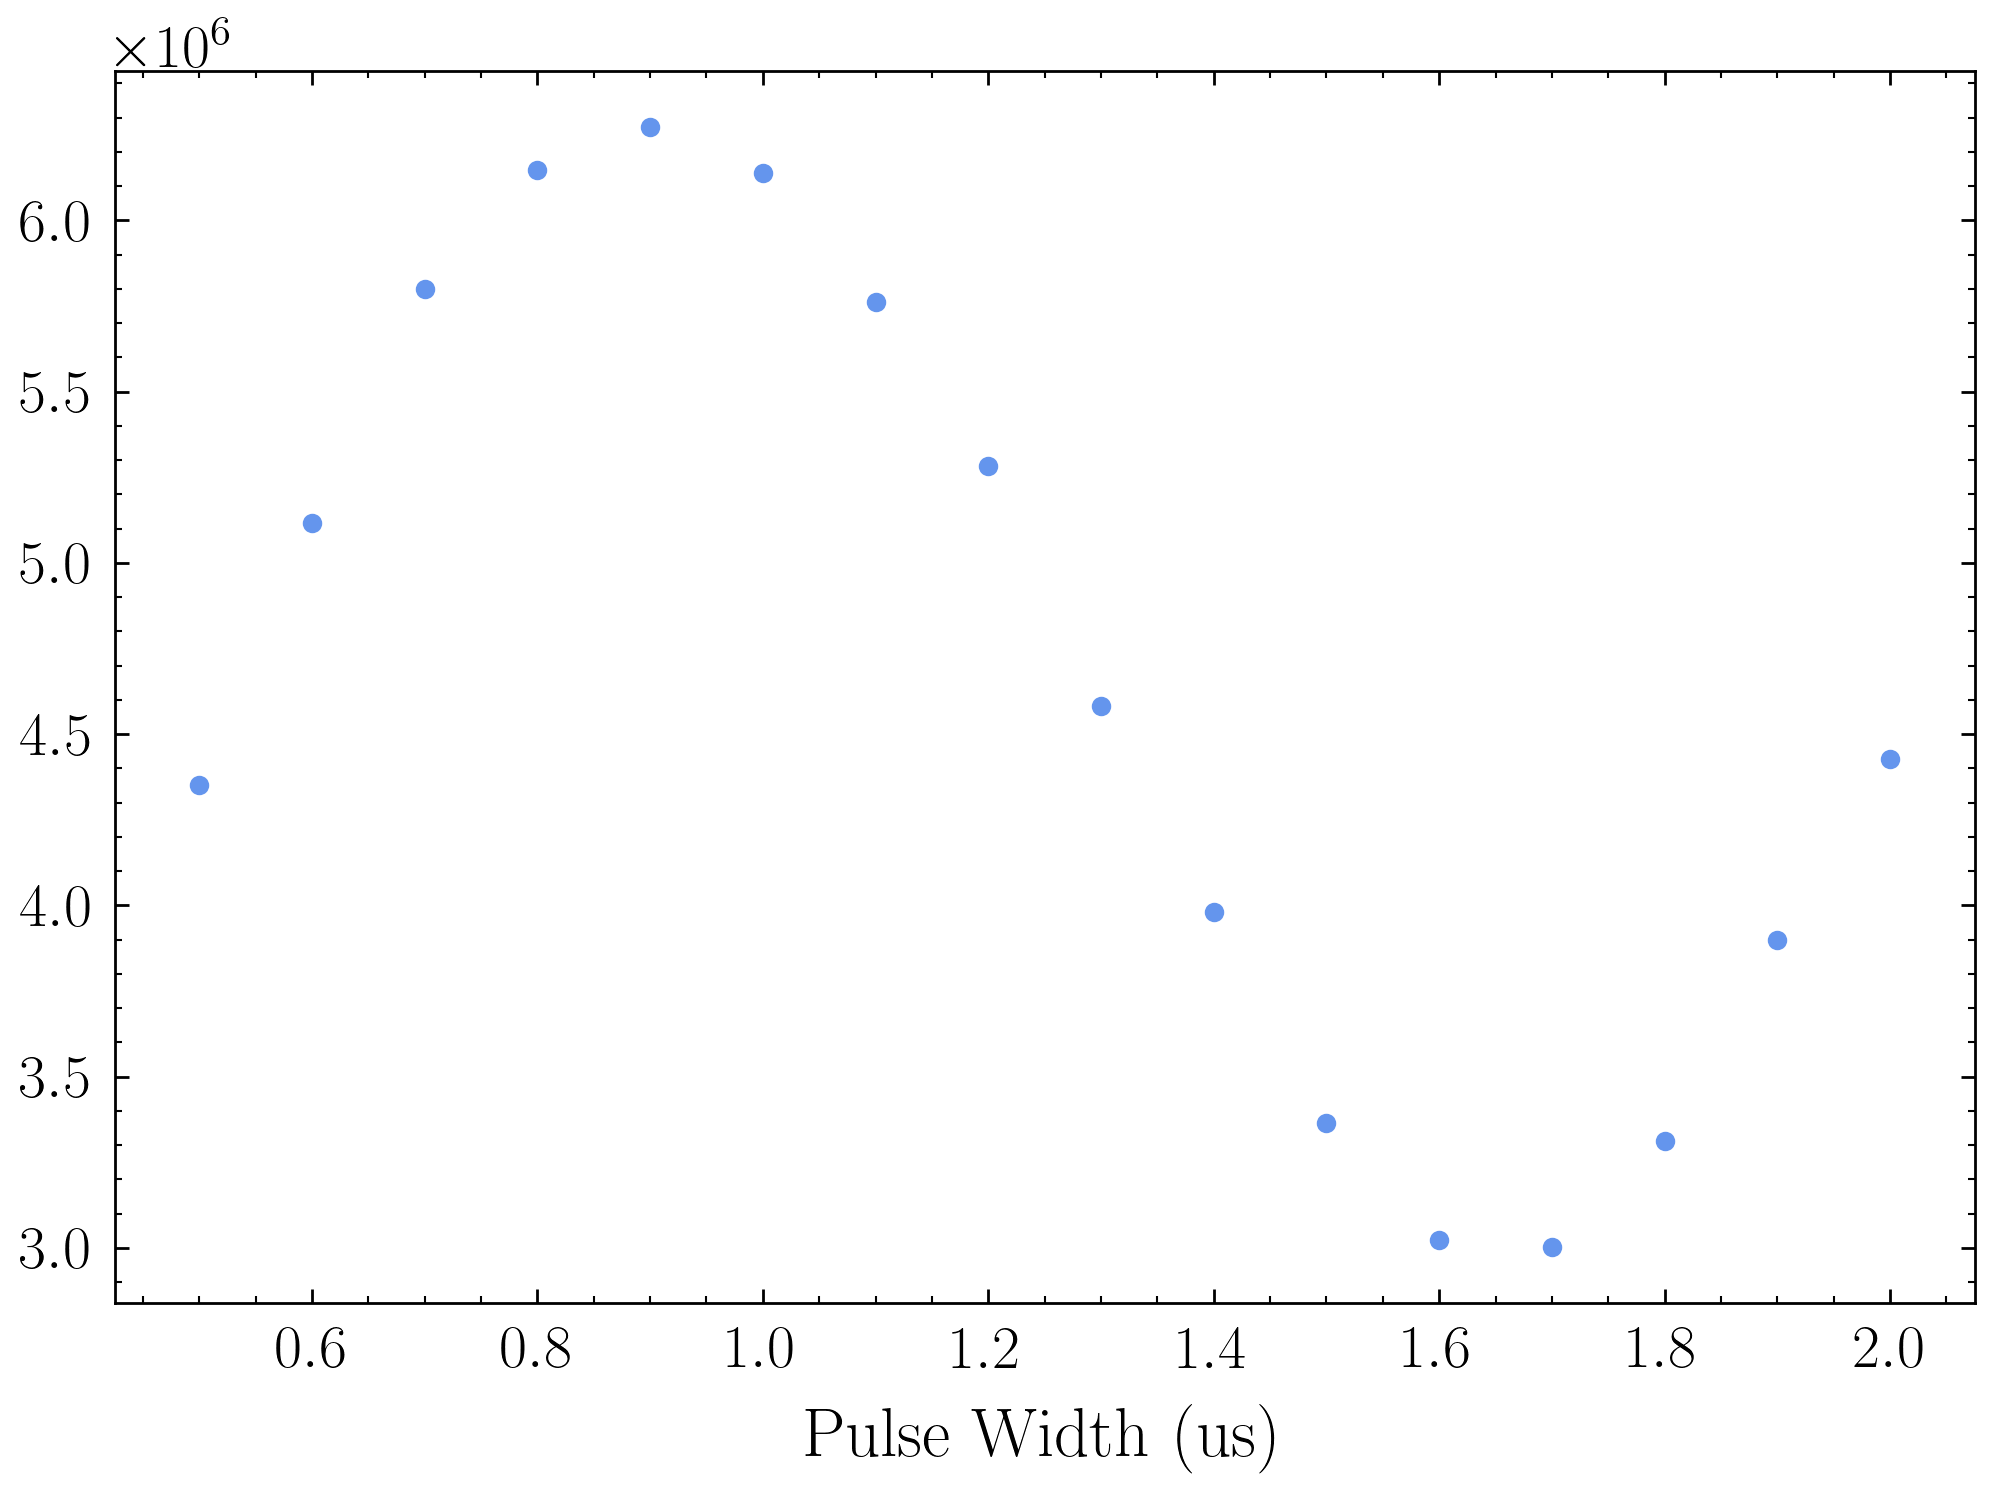

In [5]:
plt.plot(nutation_data['Pulse-Width (us)'], nutation_data['Integrated FFT Signal'], 'o')
plt.xlabel('Pulse Width (us)')

In [6]:
def fit_sin_curve(x, xc, A, w,  y0):
    return A * np.sin(np.pi * ((x - xc) / w)) + y0

p0 = [20, 2000, 0.3,2000]

popt, pcov = curve_fit(fit_sin_curve, nutation_data['Pulse-Width (us)'], nutation_data['Integrated FFT Signal'], p0=p0)
ts = np.linspace(np.min(nutation_data['Pulse-Width (us)']), np.max(nutation_data['Pulse-Width (us)']), 10000)

# plt.scatter(nutation_data['Pulse-Width (us)'], nutation_data['Integrated FFT Signal'], label='Data', color='blue')
# plt.plot(ts, fit_sin_curve(ts, *popt), label='Fit', color='red')

<h3> 2. Finding the 90 and 180 pulses

In [7]:
pi_2_pulse_duration = np.argmax(fit_sin_curve(ts, *popt))
pi_pulse_duration = np.argmin(fit_sin_curve(ts, *popt)) 

print(f'Pi/2 Pulse Duration: {ts[pi_2_pulse_duration]:.2f} us')
print(f'Pi Pulse Duration: {ts[pi_pulse_duration]:.2f} us')

Pi/2 Pulse Duration: 0.91 us
Pi Pulse Duration: 1.66 us


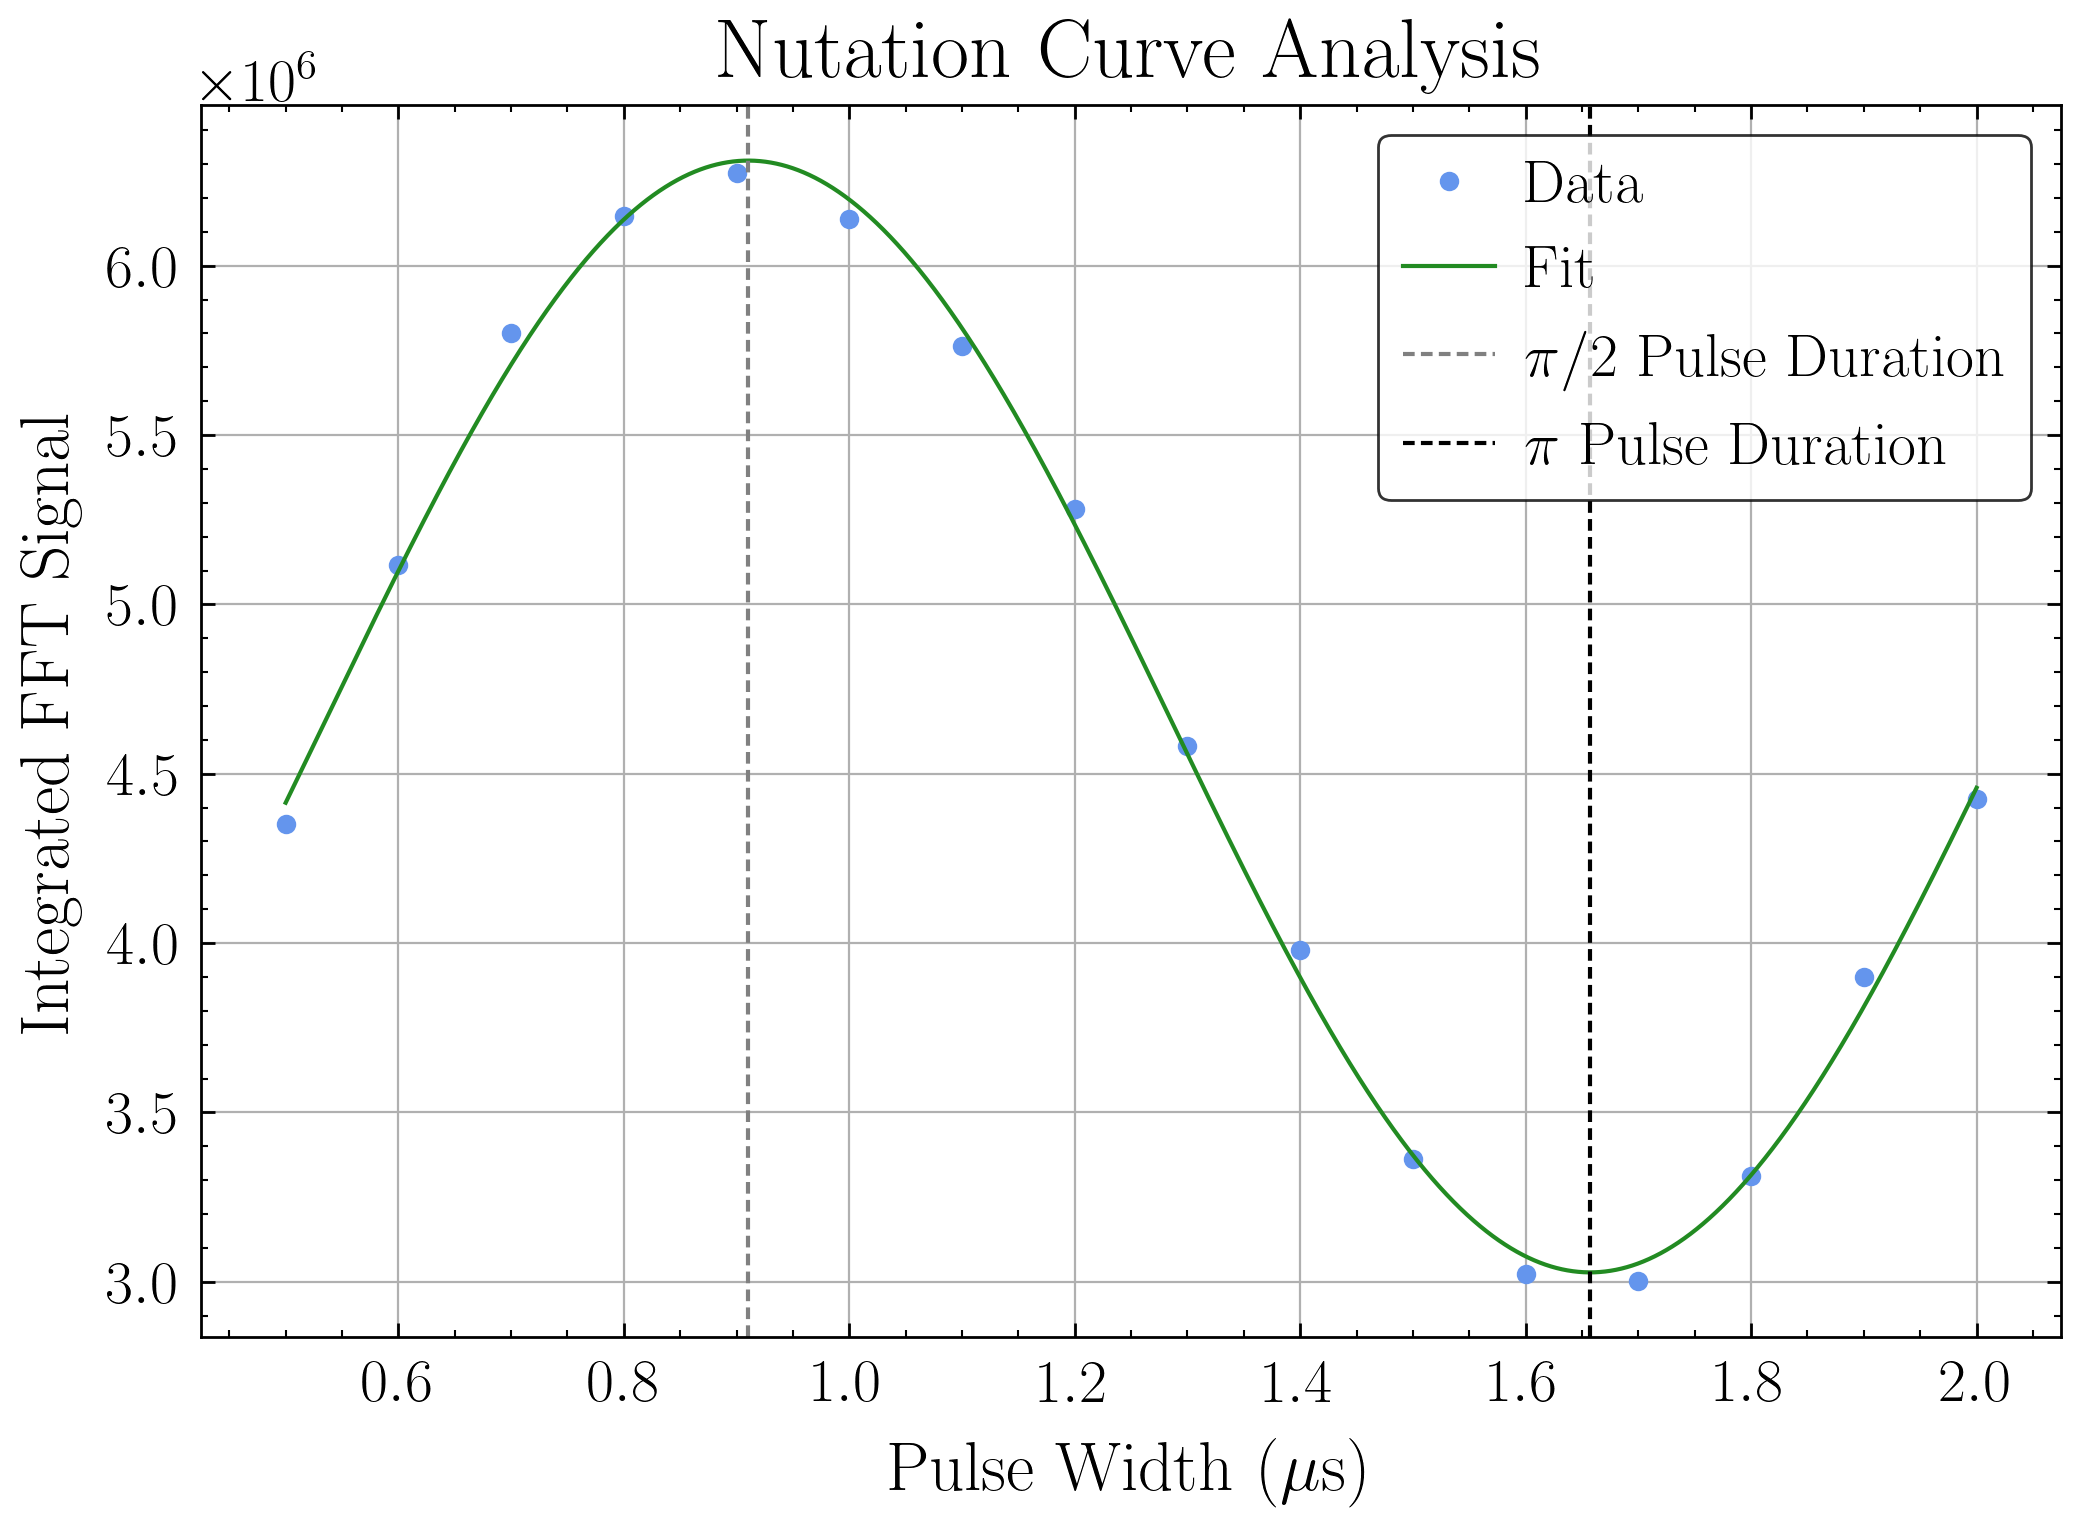

In [11]:
plt.plot(nutation_data['Pulse-Width (us)'], nutation_data['Integrated FFT Signal'], 'o', label='Data')
plt.plot(ts, fit_sin_curve(ts, *popt), label='Fit')
plt.axvline(ts[pi_2_pulse_duration], color='grey', linestyle='--', label=r'$\pi/2$ Pulse Duration')
plt.axvline(ts[pi_pulse_duration], color='black', linestyle='--', label=r'$\pi$ Pulse Duration')

plt.xlabel('Pulse Width ($\mu$s)')
plt.ylabel('Integrated FFT Signal')
plt.title('Nutation Curve Analysis of Sample 1', fontsize = 30)
plt.legend()
plt.grid(True)
plt.show()